## Assignment 3

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



__This homework assignment document will guide you through five tasks in cleaning your data.__

1. Reading and Summarizing the Data.
2. Subsetting the Data.
3. Manage Missing Data.
4. Shape the Data.
5. Saving the Results. 

# NB: From now on you should submit 1) your notebook with the answers, remember that comments are good practice, 2) a working Git page with your assignment

## Exercise 1: Loading the data:

- Load the `goodreads.csv` file into Python
- Explore it by looking at first and last 5 rows
- Change the column names to `["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']`



In [1]:
#import pandas to work with dataframes
import pandas as pd
#import numpy
import numpy as np

In [2]:
#file path 
goodreads = "data/goodreads.csv"

#read csv file in, header is set to none because the first row of the csv file already contains values 
df = pd.read_csv(goodreads, header= None)

#display head
df.head()

,0,1,2,3,4,5,6,7,8,9
0,4.40,136455.0,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974.0,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648.0,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478.0,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746.0,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564.0,"Twilight (Twilight, #1)"
3,4.23,47906.0,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123.0,To Kill a Mockingbird
4,4.23,34772.0,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992.0,Pride and Prejudice


In [3]:
#display tail
df.tail()

,0,1,2,3,4,5,6,7,8,9
5995,4.17,2226.0,0767913736,good_reads:book,https://www.goodreads.com/author/show/44565.Ca...,2005.0,/genres/history|/genres/non-fiction|/genres/bi...,dir60/78508.The_River_of_Doubt.html,16618.0,The River of Doubt
5996,3.99,775.0,1416909427,good_reads:book,https://www.goodreads.com/author/show/151371.J...,2006.0,/genres/young-adult|/genres/realistic-fiction|...,dir60/259068.Shug.html,6179.0,Shug
5997,3.78,540.0,1620612321,good_reads:book,https://www.goodreads.com/author/show/5761314....,2012.0,/genres/contemporary|/genres/romance|/genres/y...,dir60/13503247-flawed.html,2971.0,Flawed
5998,3.91,281.0,NaN,good_reads:book,https://www.goodreads.com/author/show/1201952....,2006.0,/genres/religion|/genres/islam|/genres/religio...,dir60/2750008.html,3083.0,Ø£Ø³Ø¹Ø¯ Ø§Ù Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ
5999,4.35,61.0,0786929081,good_reads:book,https://www.goodreads.com/author/show/1023510....,2001.0,/genres/fiction|/genres/fantasy|/genres/magic|...,dir60/66677.Legacy_of_the_Drow_Collector_s_Edi...,3982.0,Legacy of the Drow Collector's Edition (Legacy...


In [4]:
column_names= ["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']
#change column names to gives terms
df.columns = column_names
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455.0,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974.0,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648.0,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478.0,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746.0,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564.0,"Twilight (Twilight, #1)"
3,4.23,47906.0,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123.0,To Kill a Mockingbird
4,4.23,34772.0,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992.0,Pride and Prejudice


## Exercise 2: Subsetting the data

- Subset the data by creating new dataframe only with `["rating", 'isbn', 'author_url', 'year', 'genre_urls', 'name']`

In [5]:
subset_column_names = ["rating", 'isbn', 'author_url', 'year', 'genre_urls', 'name']

#create new dataframe with required columns only
db = df[subset_column_names]
db.head()

,rating,isbn,author_url,year,genre_urls,name
0,4.40,0439023483,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,"The Hunger Games (The Hunger Games, #1)"
1,4.41,0439358078,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,Harry Potter and the Order of the Phoenix (Har...
2,3.56,0316015849,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,"Twilight (Twilight, #1)"
3,4.23,0061120081,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,To Kill a Mockingbird
4,4.23,0679783261,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,Pride and Prejudice


## Exercise 3: Manage Missing Data
We’ve got a number of ways in general of dealing with missing data. These involve

1. Dropping off cases (or rows) in the data with any missing variables
2. Excluding variables in the data with any missing data 
3. Selectively choosing indicators with only a limited amount of missing data
4. Replacing missing variables with averages, or other representative values
5. Creating a separate model to predict missing data

- Count the missing values in each column
- Manage the missing values (delete or replace values or leave them as they are) and briefly explain your choice for each column


In [6]:
#assuming we are asked to work with the subset from now on

#loops over every column of subset
for i in range(len(subset_column_names)):

#checks if a cell in a column is empty with .isnull() and counts them with .sum()
    print('Number of values missing in column "' + str(subset_column_names[i]) + '": ' + str(np.sum([db[subset_column_names[i]].isnull()])))


Number of values missing in column "rating": 2
Number of values missing in column "isbn": 477
Number of values missing in column "author_url": 2
Number of values missing in column "year": 7
Number of values missing in column "genre_urls": 62
Number of values missing in column "name": 2


In [7]:
#check datatypes of subset
db.dtypes

rating        float64
isbn           object
author_url     object
year          float64
genre_urls     object
name           object
dtype: object

In [8]:
#deleting rows with two mistakes (noticed that by removing author_url, values of rating and name also get deleted)
db = db[db.author_url.notnull()]
db = db[db.name.notnull()]
db = db[db.rating.notnull()]
#replaced missing 'year' values by a numeric to match float data type of existing values. 
#Choose 9999 because it in outside of the range and suggest that a book was written in the future --> not possible
#Setting value to 0 would mean that a book was published e.g. during roman rule
db.year.fillna(9999, inplace = True)

#deleting the rows where author_url, name and rating are empty, also deletes their index. To work with the dataframe smoothly we create a new index
db=db.reset_index()
#the old index is abundant now and can/must be deleted (I'm sure there's a more beautiful solution for this issue. Probably through pd.map())
db = db.drop('index', axis=1)

#print number of empty cells per columns
for i in range(len(subset_column_names)):
    print('Now the number of values missing in column "' + str(subset_column_names[i]) + '" is: ' + str(np.sum([db[subset_column_names[i]].isnull()])))

'''cells in isbn and genre_urls are being left as they are:
-isbn in an unique identifier of every published book. It is impossible to guess this.
Setting every missing isbn to the same value would defeat its purpose as ID. Researching the isbn manually would have been a possibility (theoretically)
-genre_url is additional, less relevant information and impossible to guess. Leave as is, is the only correct stategy
'''

Now the number of values missing in column "rating" is: 0
Now the number of values missing in column "isbn" is: 475
Now the number of values missing in column "author_url" is: 0
Now the number of values missing in column "year" is: 0
Now the number of values missing in column "genre_urls" is: 60
Now the number of values missing in column "name" is: 0


C:\Users\Dennis\AppData\Local\Temp\ipykernel_40308\357059978.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db.year.fillna(9999, inplace = True)


'cells in isbn and genre_urls are being left as they are:\n-isbn in an unique identifier of every published book. It is impossible to guess this.\nSetting every missing isbn to the same value would defeat its purpose as ID. Researching the isbn manually would have been a possibility (theoretically)\n-genre_url is additional, less relevant information and impossible to guess. Leave as is, is the only correct stategy\n'

In [9]:
#get an overview of dataframe
db.describe()

,rating,year
count,5998.000000,5998.000000
mean,4.042201,1975.778926
std,0.260661,296.737722
min,2.000000,-1500.000000
25%,3.870000,1980.000000
50%,4.050000,2002.000000
75%,4.210000,2009.000000
max,5.000000,9999.000000


## Exercise 4: Shape the data
- Parse the `author_url` to create new column named `author`
- Sort the data by putting higher rates go first. If there are overlapping rates, try to put earlier years go first.
- **(Stretch Goal)** Examine how many books were published at each year and find lowest, highest rate of each year. 

In [10]:
#function returns authors name as explained in Lab Notebook Part 2
def get_author(url):
    name = url.split('/')[-1].split('.')[1:][0]
    return name

In [11]:
#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names

db['author'] = db.author_url.map(get_author)
db.head()

,rating,isbn,author_url,year,genre_urls,name,author
0,4.40,0439023483,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins
1,4.41,0439358078,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling
2,3.56,0316015849,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,"Twilight (Twilight, #1)",Stephenie_Meyer
3,4.23,0061120081,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,To Kill a Mockingbird,Harper_Lee
4,4.23,0679783261,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,Pride and Prejudice,Jane_Austen


.map() is definitely the easier and faster method working with dataframe and pandas. 
A group member however wanted the column author to be between the columns isbn and author_url, and not randomly be appended at the end of the dataframe. They chose the following code:

In [12]:
#Reset the dataframe to show the alternative
db = db.drop('author', axis=1)
db.head()

,rating,isbn,author_url,year,genre_urls,name
0,4.40,0439023483,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,"The Hunger Games (The Hunger Games, #1)"
1,4.41,0439358078,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,Harry Potter and the Order of the Phoenix (Har...
2,3.56,0316015849,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,"Twilight (Twilight, #1)"
3,4.23,0061120081,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,To Kill a Mockingbird
4,4.23,0679783261,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,Pride and Prejudice


In [13]:
#create empty list
lst=[]

#loop through every row in dafaframe
for i in range(db.shape[0]):
    
#add the author's name to the list, after using the get_author function 
    lst.append(get_author(str(db.loc[i,'author_url'])))

#check if the column author already exists, to avoid duplicated
if 'author' not in db.columns:

#put the column name and list on the third position of dataframe  
    db.insert(2, 'author', lst, True)
db.head()


,rating,isbn,author,author_url,year,genre_urls,name
0,4.40,0439023483,Suzanne_Collins,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,"The Hunger Games (The Hunger Games, #1)"
1,4.41,0439358078,J_K_Rowling,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,Harry Potter and the Order of the Phoenix (Har...
2,3.56,0316015849,Stephenie_Meyer,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,"Twilight (Twilight, #1)"
3,4.23,0061120081,Harper_Lee,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,To Kill a Mockingbird
4,4.23,0679783261,Jane_Austen,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,Pride and Prejudice


The code opens the possibility to insert the new column at any position in the dataframe. Since this was not asked specifically in the assignment, the first way with .map() is sufficient, cleaner and most efficient

In [14]:
#sort values by rating first (highest values first)
#secondary sort by year (oldest books first)
db.sort_values(by = ['rating', 'year'], ascending=[False,True])

,rating,isbn,author,author_url,year,genre_urls,name
2909,5.00,0983002215,Rebekah_McClew,https://www.goodreads.com/author/show/6589034....,2011.0,NaN,Family Secrets
2145,5.00,1300589469,I_M_Nobody,https://www.goodreads.com/author/show/6906561....,2012.0,NaN,A Book About Absolutely Nothing.
2903,5.00,0983002282,Rebekah_McClew,https://www.goodreads.com/author/show/6589034....,2012.0,NaN,Obscured Darkness (Family Secrets #2)
4472,5.00,NaN,Ronda_Paige,https://www.goodreads.com/author/show/6896621....,2012.0,NaN,Patience's Love
5690,5.00,NaN,Subhajit_Ganguly,https://www.goodreads.com/author/show/5989528....,2012.0,NaN,Abstraction In Theory - Laws Of Physical Trans...
...,...,...,...,...,...,...,...
5112,3.01,0452286530,Karen_Joy_Fowler,https://www.goodreads.com/author/show/1448.Kar...,2004.0,/genres/fiction|/genres/womens-fiction|/genres...,The Jane Austen Book Club
5842,2.97,0395083621,Adolf_Hitler,https://www.goodreads.com/author/show/30691.Ad...,1925.0,/genres/history|/genres/non-fiction|/genres/bi...,Mein Kampf
2609,2.90,NaN,Mary_Williams,https://www.goodreads.com/author/show/7707820....,2013.0,/genres/romance|/genres/realistic-fiction|/gen...,How To Be A Perfect Girl
5977,2.77,0060988649,Gregory_Maguire,https://www.goodreads.com/author/show/7025.Gre...,2001.0,/genres/fantasy|/genres/fiction|/genres/myster...,Lost


Stretch goal:

In [15]:
#for every year in the dataframe count the number of ratings and show each year's min and max rating
#.iloc[:-1] omits the last row, which would be the year 9999 (see exercise 3)
db.groupby('year').agg({'rating' : ['count','min', 'max']}).iloc[:-1]


rating            
         count   min   max
year                      
-1500.0      1  3.60  3.60
-800.0       2  3.68  4.01
-560.0       1  4.03  4.03
-512.0       1  3.92  3.92
-500.0       1  4.06  4.06
...        ...   ...   ...
 2010.0    317  3.08  4.93
 2011.0    374  2.00  5.00
 2012.0    355  3.15  5.00
 2013.0    276  2.90  4.93
 2014.0     87  3.31  5.00

[293 rows x 3 columns]

## Exercise 5: Saving the results
- Save the cleaned dataframe as 'hw-03-cleaned.csv' in data folder

In [16]:
clean_db = db.sort_values(by = ['rating', 'year'], ascending=[False,True])

#Save the dataframe in the folder data, use comma as seperator and omit index
clean_db.to_csv('data/hw-03-cleaned.csv', sep =',', index = False)

## Exercise 6: Investigate the relationship between the number of reviews and the average rating for books in the dataset cleaned-goodreads.csv procided.

- Calculate the correlation coefficient. Give me a short definition of this coefficient
- Create a scatter plot showing the relationship between these two features.
- Based on the plot and the correlation, provide a brief interpretation of the relationship.

### Python Tools: Use pandas and numpy for correlation, and matplotlib or seaborn for the scatter plot.

In [17]:
cleaned_goodreads = "data/cleaned-goodreads.csv"

#read csv file in 
df_new = pd.read_csv(cleaned_goodreads)

#display head
df_new.head()

,rating,review_count,isbn,booktype,author_url,year,dir,rating_count,name,author,genres
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,young-adult|science-fiction|dystopia|fantasy|s...
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,young-adult|fantasy|romance|paranormal|vampire...
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee,classics|fiction|historical-fiction|academic|s...
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen,classics|fiction|romance|historical-fiction|li...


In [18]:
#create subset of relevant columns
sub = df_new[['rating','review_count']]

#Calcute Standard correlation according to Pearson (linear)
sub.corr()

,rating,review_count
rating,1.000000,-0.037896
review_count,-0.037896,1.000000


Results for Pearson's correlation lie in [-1:1]
High correlation is given if the absolute value is high {-1, -0.9, -0.8, 0.8, 0.9, 1}. No correlation is represented by 0. The lower the absolute value, the weaker the correlation, and vise versa.
The algebraic sign indicates if the correlation is positive or negative.



<Axes: xlabel='review_count', ylabel='rating'>

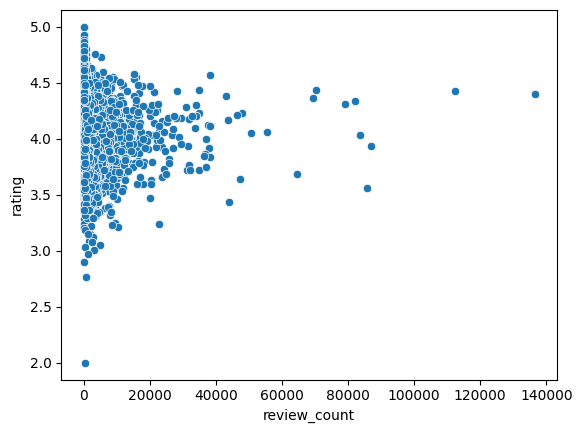

In [19]:
#import seaborn to plot data
import seaborn as sns

#plot scatter plot with given values
sns.scatterplot(data=sub, x = 'review_count', y = 'rating')

In the exercise there is no significant correlation between the number of reviews and the book rating, as the correlation coefficient -0.037896 is almost 0.
Since no correlation exists, you cannot see it the scatter plot.
Interesting: Many times books were not reviewed, when giving them a rating.

## Exercise 7: Calculate the following descriptive statistics for the numerical features (e.g., number of reviews, average rating, etc.):
- Mean
- Median
- Standard Deviation
- Range
- Create a histogram or box plot for at least one of the numerical features, highlighting any skewness or outliers.
    
### Python Tools: Use pandas for data manipulation and matplotlib or seaborn for visualization.

In [20]:
#create new subset of numerical values only (isbn is excluded on purpose)
sub_new=df[['rating', 'review_count', 'year', 'rating_count']]
#calculate mean, median, standard deviation and skewness
sub_new.agg(['mean', 'median','std', 'skew'])

,rating,review_count,year,rating_count
mean,4.042201,2372.487162,1969.085099,51142.779760
median,4.050000,932.500000,2002.000000,18063.000000
std,0.260661,5491.177007,185.383169,137599.314896
skew,-0.119120,9.605601,-11.268053,9.222233


In [21]:
#calculate range for each columns by subtracting x_min from x_max
sub_new.agg(['max', 'min']).loc['max'] - sub_new.agg(['max', 'min']).loc['min']



rating                3.0
review_count     136455.0
year               3514.0
rating_count    2958969.0
dtype: float64

Alternatively, it is possible to include the range along with mean, median and std in the first matrix. The following code is displayed as an image.

--------------------------------------------------------------------------------
![](alt.png)

--------------------------------------------------------------------------------

<Axes: ylabel='rating'>

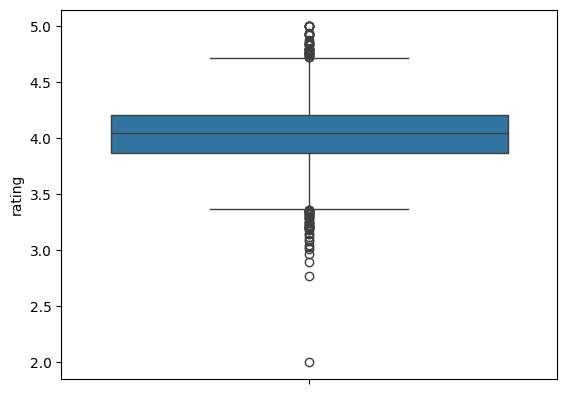

In [22]:
#create boxplot of the rating column showing skewness and outliers
sns.boxplot(data = sub['rating'])

<Axes: xlabel='rating', ylabel='Count'>

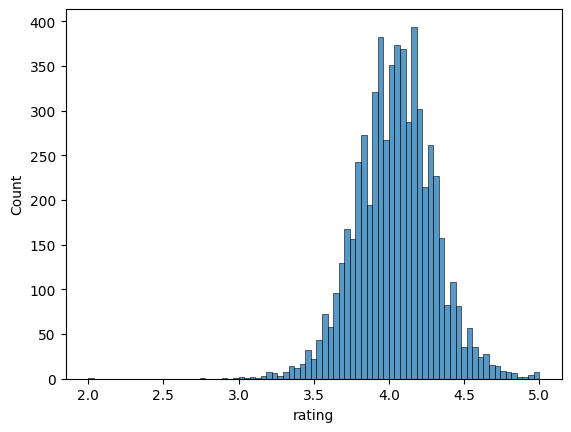

In [23]:
#create histogram of the rating column showing skewness and outliers
sns.histplot(sub['rating'])